In [1]:
import pandas as pd
import numpy as np
import os
import glob

In [2]:
cwd = os.getcwd()
print(cwd)
listOfFiles = sorted(glob.glob("NASA*.txt"))
print(len(listOfFiles))

/Users/molfesepj/Desktop/EEG_DATA/NASA_6x25_OHBM2019
2088


In [668]:
class PCAFile(object):
    dim = ((),)
    
    def __init__(self, filename, subjectID, condition, stimulus):
        """Returns Object representing a single input file"""
        self.filename = filename
        self.subjectID = subjectID
        self.condition = condition
        self.stimulus = stimulus
        self.componentNames = []
        self.components = []
        self.eeg_data = pd.read_csv(aFile, sep = '\t', header=None)
        
    def getData(self):
        return self.eeg_data
        
    def addComponents(self, name, component):
        self.componentNames.append(name)
        self.components.append(component)
        
    def getComponentNames(self):
        return self.componentNames
    
    def getNamedComponent(self, name):
        indexOfInterest = self.componentNames.index(name)
        return self.components[indexOfInterest]
    
    def getComponents(self):
        return self.components
    
    def getDimensions(self):
        return self.dim
    
    def getPeakforElectrodesInWindow(self,timeWindow,electrodes,polarity='positive', numAdaptive=1, baseline=25):
        """"""
        """
        timeWindow = list: window of time to search for a peak
        electrodes = list: set of electrodes to pull the data from
        polarity = str: positive | negative
        numAdaptive = int: number of time point to average around max/min value
        
        assumes electrodes are not zero-based, time is also not zero-based
        """
        calculationList = []
        
        #calculate window start/end
        startWin = min(timeWindow) + baseline #assumes window passed is taking baseline into account
        startWin = startWin//4 #convert to datapoints
        endWin = max(timeWindow) + baseline #but this is just searching the raw array
        endWin = endWin//4 #convert to datapoints
        
        
        for anElectrode in electrodes:
            if polarity == 'positive':
                peakV = self.eeg_data.iloc[startWin:endWin,(anElectrode-1)].max()
                peakL = self.eeg_data.iloc[startWin:endWin,(anElectrode-1)].idxmax()
            if polarity == 'negative':
                peakV = self.eeg_data.iloc[startWin:endWin,(anElectrode-1)].min()
                peakL = self.eeg_data.iloc[startWin:endWin,(anElectrode-1)].idxmin()
            if numAdaptive > 1:
                peakWindowStart = peakL-numAdaptive
                peakWindowEnd = peakL+numAdaptive
                peakV = self.eeg_data.iloc[peakWindowStart:peakWindowEnd,(anElectrode-1)].mean()
            calculationList.append(peakV)
            
            
        peakValueFinal = np.asarray(calculationList).mean()
        return peakValueFinal
        
            
            
            

In [4]:
#should come up with a way of encoding number of electrodes here
NUM_ELECTRODES=257

In [669]:
from tqdm import tqdm
mydata = []
ct = len(listOfFiles)

for indx in tqdm(range(0,ct)):
    aFile = listOfFiles[indx]
    subID = aFile.split("_")[1]
    cond = aFile.split("_")[3]
    stim = aFile.split("_")[5].split(".txt")[0]
    #print("SubID: {} Cond: {} Stim: {}".format(subID, cond, stim))
    
    if "1HDT" in cond:
        cond = '1HDT'
    if "1U" in cond:
        cond = "1U"
    if "2HDT" in cond:
        cond = "2HDT"
    if "2U" in cond:
        cond = "2U"
    
    tmp = PCAFile(aFile, subID, cond, stim)
    mydata.append(tmp)

100%|██████████| 2088/2088 [00:41<00:00, 50.69it/s]


In [617]:
#mydata[0].getData().head()
mydata[0].getPeakforElectrodesInWindow([10,20],[10,11], 'negative')

Window: 35-45


-2.7051705000000004

In [629]:
mydata[0].getData() #.iloc[10+25:20+25,11:13]

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-2.098813,-1.787315,-1.017317,-0.646760,-0.689496,-0.532122,0.031831,0.125043,0.059748,-2.143487,...,1.323727,1.380738,1.453649,1.637147,0.929412,1.163759,1.691227,1.617426,1.209030,-0.085132
1,-2.274852,-1.920565,-1.196043,-0.592975,-0.622230,-0.506785,0.120897,0.332476,0.369176,-2.207146,...,0.871257,0.897012,0.882098,1.110098,0.554007,0.890327,1.338553,1.190324,0.865841,0.165842
2,-2.315788,-1.918868,-1.200985,-0.565939,-0.556711,-0.528719,0.126444,0.421873,0.515595,-2.185226,...,0.482011,0.372776,0.266981,0.491003,0.306148,0.557011,0.885051,0.664076,0.464371,0.289958
3,-2.276556,-1.852831,-1.042926,-0.591222,-0.533349,-0.592982,0.060211,0.373489,0.483648,-1.842759,...,0.169375,-0.121601,-0.286295,-0.120542,0.176312,0.186876,0.392565,0.117029,0.039599,0.289189
4,-2.172894,-1.744687,-0.788171,-0.662456,-0.557835,-0.659162,-0.035194,0.224943,0.324252,-1.819660,...,-0.069264,-0.521639,-0.694154,-0.627604,0.126308,-0.177644,-0.064156,-0.363840,-0.369046,0.209096
5,-1.990610,-1.568842,-0.535636,-0.753559,-0.613590,-0.687660,-0.120117,0.038724,0.115813,-1.779825,...,-0.254175,-0.797693,-0.934348,-0.982025,0.098485,-0.500615,-0.435949,-0.727485,-0.742169,0.103195
6,-1.687942,-1.259196,-0.351950,-0.812068,-0.656514,-0.646098,-0.159674,-0.110033,-0.055066,-1.410230,...,-0.397473,-0.945237,-1.033157,-1.181364,0.054022,-0.750673,-0.700115,-0.959777,-1.066116,0.025135
7,-1.219521,-0.749294,-0.225972,-0.765196,-0.623139,-0.512905,-0.124261,-0.152000,-0.116045,-1.048281,...,-0.490079,-0.971100,-1.035501,-1.249189,-0.006570,-0.900531,-0.853266,-1.072139,-1.318870,0.021070
8,-0.593524,-0.048512,-0.096652,-0.567436,-0.476552,-0.302983,-0.016536,-0.067275,-0.051114,-0.330287,...,-0.532245,-0.909259,-1.000556,-1.236859,-0.074803,-0.955070,-0.926183,-1.109643,-1.490683,0.098925
9,0.125123,0.744637,0.120034,-0.207605,-0.207238,-0.043437,0.148486,0.126086,0.115606,0.388397,...,-0.529971,-0.798678,-0.964924,-1.187744,-0.138724,-0.936244,-0.954778,-1.115368,-1.571311,0.247158


In [7]:
#concatenate all files with transpose
longdata = pd.DataFrame()

ct = len(mydata)
for indx in tqdm(range(0,ct)):
    if indx == 0:
        tmp = mydata[indx].getData()
        longdata = tmp.iloc[::2,:].transpose()
    else:
        tmp = mydata[indx].getData()
        longdata = longdata.append(tmp.iloc[::2,:].transpose(), ignore_index=True)

100%|██████████| 2088/2088 [02:49<00:00,  6.18it/s]


In [8]:
print(longdata.shape)
print(257*6*4*87) #257 channels technically, 125 samples

(536616, 125)
536616


In [291]:
from statsmodels.multivariate.pca import PCA
print("Starting Temporal PCA")
temporalPCA = PCA(longdata.values, standardize=True, ncomp=12, method='nipals')
print("Starting Holt Parallel Test PCA")
tprand = np.random.rand(longdata.shape[0], longdata.shape[1])
tprandPCA = PCA(tprand, standardize=True, ncomp=12, method='nipals')

Starting Temporal PCA
Starting Holt Parallel Test PCA


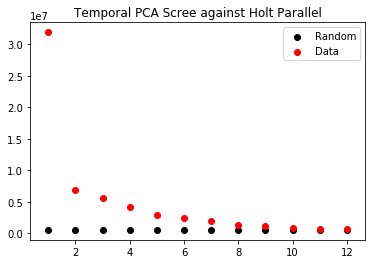

In [292]:
%matplotlib inline
import matplotlib.pyplot as plt
r1 = tprandPCA.eigenvals
r2 = temporalPCA.eigenvals
plt.scatter(range(1,13),r1, color='black', label='Random')
plt.scatter(range(1,13),r2, color='red', label='Data')
plt.legend(loc='upper right')
plt.title('Temporal PCA Scree against Holt Parallel')
plt.show()

In [11]:
PCA_NUM_T = 7

In [496]:
from statsmodels.multivariate.pca import PCA
print('Temporal PCA with {} Factors'.format(PCA_NUM_T))
temporalPCA = PCA(longdata.values, standardize=False, ncomp=PCA_NUM_T, method='nipals')

Temporal PCA with 7 Factors


In [283]:
temporalPCA.eigenvals

array([3.83767057e+08, 7.45591590e+07, 3.95629034e+07, 2.65514219e+07,
       1.14565670e+07, 6.86488366e+06, 5.05447786e+06])

In [285]:
temporalPCA.loadings.shape

(125, 7)

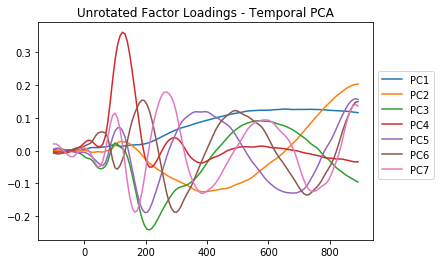

In [497]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(-100,900,8), temporalPCA.loadings)
plt.title('Unrotated Factor Loadings - Temporal PCA')
pcnames = list( np.char.mod('PC%d', np.arange(1,8) ) )
plt.legend(labels=pcnames, loc='best', bbox_to_anchor=(1.0, 0.8), shadow=False, ncol=1)
plt.show()

In [15]:
from statsmodels.multivariate.factor_rotation import promax
promaxtPCA = promax(temporalPCA.loadings,2)

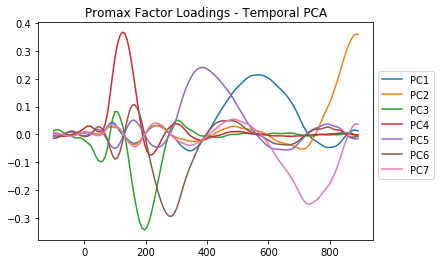

In [492]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(-100,900,8), promaxtPCA[0])
plt.title('Promax Factor Loadings - Temporal PCA')
pcnames = list( np.char.mod('PC%d', np.arange(1,9) ) )
plt.legend(labels=pcnames, loc='best', bbox_to_anchor=(1.0, 0.8), shadow=False, ncol=1)
plt.show()

In [17]:
#Get information on max and min of each factor
print(np.amax(promaxtPCA[0], axis=0)) #max for each factor
print(8*np.argmax(promaxtPCA[0], axis=0)) #index (time point) of that value
print(np.amin(promaxtPCA[0], axis=0)) #min
print(8*np.argmin(promaxtPCA[0], axis=0)) #time of min

[0.21362585 0.35992265 0.08221475 0.36670529 0.2401755  0.10678807
 0.05481469]
[672 984 200 224 488 264 584]
[-0.05828641 -0.05290472 -0.34250777 -0.07332419 -0.0557789  -0.29358409
 -0.24998653]
[440 808 296 320 760 384 832]


In [18]:
#do we want to put the temporal factors back into the class? 
#seems like we're only going to need temporal + spatial in the end
print(temporalPCA.scores.shape)
print(257*87*6*4) #order is channels257; cond (1HDT, 1U, 2HDT, 2U); stim (ba, bu, da, du, ga, gu); subject
print(temporalPCA.scores.shape[0] // NUM_ELECTRODES)
SPATIAL_ROWS = (temporalPCA.scores.shape[0] // NUM_ELECTRODES)

(536616, 7)
536616
2088


In [19]:
#Begin Spatial PCA
from statsmodels.multivariate.pca import PCA

spatialPCEigs = []
reshapedPCs = []

for aPC in np.arange(0,PCA_NUM_T):
    tmpSpatial = pd.DataFrame(temporalPCA.scores[:,aPC].reshape(SPATIAL_ROWS, NUM_ELECTRODES))
    reshapedPCs.append(tmpSpatial)
    print("Spatial PCA in Progress: {}".format(aPC))
    spatialPCA = PCA(tmpSpatial, standardize=True, ncomp=12, method='nipals')
    spatialPCEigs.append(spatialPCA.eigenvals)

spatialEigs = np.array(spatialPCEigs).mean(axis=0)

Spatial PCA in Progress: 0
Spatial PCA in Progress: 1
Spatial PCA in Progress: 2
Spatial PCA in Progress: 3
Spatial PCA in Progress: 4
Spatial PCA in Progress: 5
Spatial PCA in Progress: 6


In [20]:
from statsmodels.multivariate.pca import PCA

print("Starting Holt Parallel Test - Spatial PCA")
sprand = np.random.rand(SPATIAL_ROWS,NUM_ELECTRODES)
sprandPCA = PCA(sprand, standardize=True, ncomp=12, method='nipals')

Starting Holt Parallel Test - Spatial PCA


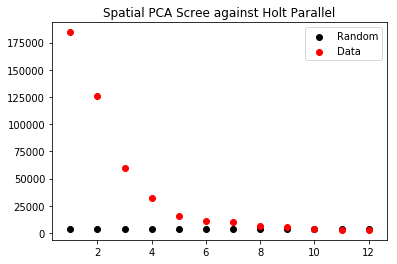

In [288]:
%matplotlib inline
import matplotlib.pyplot as plt
r1 = sprandPCA.eigenvals
r2 = spatialEigs
plt.scatter(range(1,13),r1, color='black', label='Random')
plt.scatter(range(1,13),r2, color='red', label='Data')
plt.legend(loc='upper right')
plt.title('Spatial PCA Scree against Holt Parallel')
plt.show()

In [22]:
PCA_NUM_S = 8

In [23]:
import mne
import neo

spatialPCs = []

for aComponent in reshapedPCs:
    #create a header & make an MNE dataset
    sfreq = 125
    times = np.arange(0,900,8)
    ch_types = ['eeg']*257
    ch_names = list( np.char.mod('E%d', np.arange(1,257) ) )
    ch_names.append('Cz')
    info = mne.create_info(ch_names = ch_names, sfreq=sfreq, ch_types=ch_types, montage='GSN-HydroCel-257')
    raw = mne.io.RawArray(np.transpose(aComponent), info) #load first temporal PC scores in
    spatialPCs.append(raw)


Creating RawArray with float64 data, n_channels=257, n_times=2088
    Range : 0 ... 2087 =      0.000 ...    16.696 secs
Ready.
Creating RawArray with float64 data, n_channels=257, n_times=2088
    Range : 0 ... 2087 =      0.000 ...    16.696 secs
Ready.
Creating RawArray with float64 data, n_channels=257, n_times=2088
    Range : 0 ... 2087 =      0.000 ...    16.696 secs
Ready.
Creating RawArray with float64 data, n_channels=257, n_times=2088
    Range : 0 ... 2087 =      0.000 ...    16.696 secs
Ready.
Creating RawArray with float64 data, n_channels=257, n_times=2088
    Range : 0 ... 2087 =      0.000 ...    16.696 secs
Ready.
Creating RawArray with float64 data, n_channels=257, n_times=2088
    Range : 0 ... 2087 =      0.000 ...    16.696 secs
Ready.
Creating RawArray with float64 data, n_channels=257, n_times=2088
    Range : 0 ... 2087 =      0.000 ...    16.696 secs
Ready.


In [693]:
from mne.preprocessing import ICA

#important difference between n_pca_components and max_pca_components!!!  USE n_pca_components!
ICAresults = []

for aPC in spatialPCs:
    myICA = ICA(n_components = PCA_NUM_S, method='infomax', random_state=0, max_iter=100, max_pca_components=PCA_NUM_S)
    picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False)
    myICA.fit(aPC, picks=picks, decim=3, reject=None)
    ICAresults.append(myICA)
    

Fitting ICA to data using 257 channels (please be patient, this may take a while)
Selection by number: 8 components
 
Fitting ICA took 0.5s.
Fitting ICA to data using 257 channels (please be patient, this may take a while)
Selection by number: 8 components
 
Fitting ICA took 0.4s.
Fitting ICA to data using 257 channels (please be patient, this may take a while)
Selection by number: 8 components
 
Fitting ICA took 0.2s.
Fitting ICA to data using 257 channels (please be patient, this may take a while)
Selection by number: 8 components
 
Fitting ICA took 0.4s.
Fitting ICA to data using 257 channels (please be patient, this may take a while)
Selection by number: 8 components
 
Fitting ICA took 0.4s.
Fitting ICA to data using 257 channels (please be patient, this may take a while)
Selection by number: 8 components
 
Fitting ICA took 0.4s.
Fitting ICA to data using 257 channels (please be patient, this may take a while)
Selection by number: 8 components
 
Fitting ICA took 0.3s.


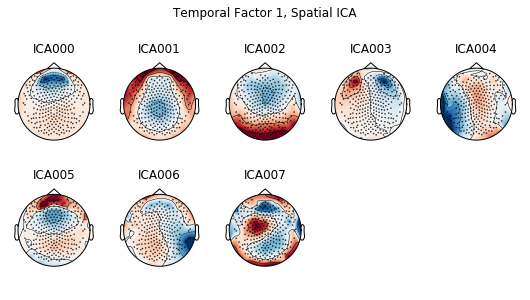

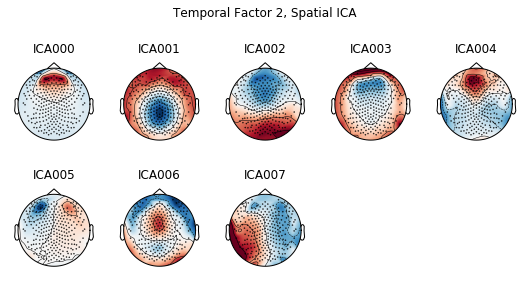

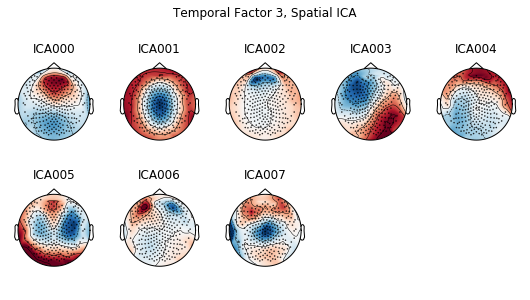

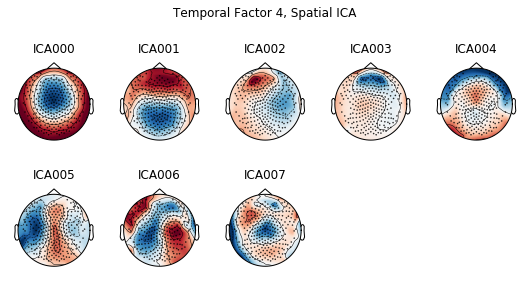

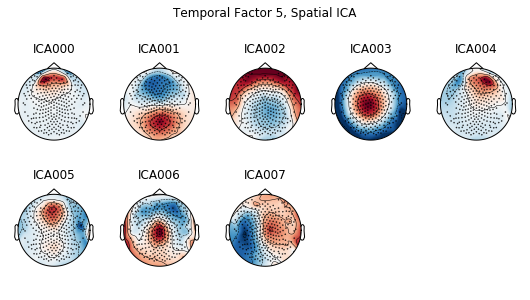

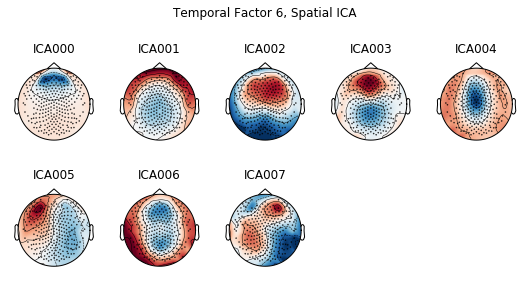

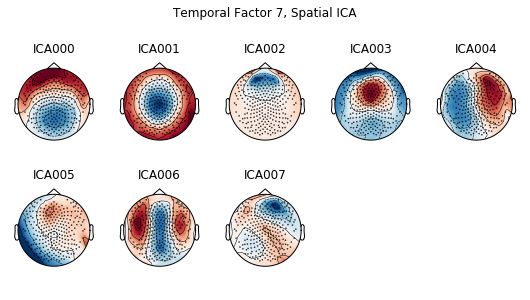

In [694]:
ct = 1
for anICA in ICAresults:
    anICA.plot_components(title='Temporal Factor {}, Spatial ICA'.format(ct), topomap_args={'times' : 8})
    ct = ct+1

In [695]:
#dir(ICAresults[1])
for anICA in ICAresults:
    components = myICA.get_components() #use this to get NDarray of components
    print(components.shape) #so this is all 7 temporal components, each giving 8 spatial components!

(257, 8)
(257, 8)
(257, 8)
(257, 8)
(257, 8)
(257, 8)
(257, 8)


In [27]:
#unmixing matrix is the equivalent to the loadings
#it is component x component - so in this case 8x8

#to look at the unmixing matrix we do this: 
#print(ICAresults[0].unmixing_matrix_)

#unmixing matrix tells us importance of the PCA components run first
#so now we need to also know the loadings from the PCA step!

#this is how we get the ICA components
#ICAresults[0].get_components()[:,0] #ICA component 0

#these are how we get PCA components before the ICA!
#ICAresults[0].pca_components_.shape #gets actual components for first ICA (8, 257)
#ICAresults[0].pca_explained_variance_ #just variance by component
ICAresults[0].pca_components_[0].shape

#to calculate factor loadings from Scipy PCA
#print(ICAresults[0].pca_components_.shape) # = (8,257)
#print(ICAresults[0].pca_explained_variance_.shape) # = (8,)
##loadings = ICAresults[0].pca_components_[0,:] * np.sqrt(ICAresults[0].pca_explained_variance_[0])


#loadings[0][loadings[0]>0.5] #get loadings greater than 0.4

(257,)

In [602]:
def getTemporalWindows(temporalFactor, threshold):
    """Returns temporal window over a particular threshold (absolute values)"""
    factorOfInterest = promaxtPCA[0][0:,temporalFactor]
    factorTiming = np.argwhere( (factorOfInterest >= threshold) | (factorOfInterest <= -threshold) ).flatten()
    tmp = (factorTiming) * 8 - 100
    return tmp.tolist()

In [ ]:
index = np.arange(-100,900,8)
promaxLoadings = pd.DataFrame(promaxtPCA[0], index=index)
promaxLoadingsThresh = promaxLoadings.where(promaxLoadings >= 0.2)
promaxLoadingsClean = promaxLoadingsThresh.dropna(how='all')
for aColumn in range(0,promaxLoadingsClean.shape[1]):
    print("Positive Component number: {}".format(aColumn+1))
    print(promaxLoadingsClean.loc[:,aColumn].dropna())


In [ ]:
promaxLoadings = pd.DataFrame(promaxtPCA[0], index=index)
promaxLoadingsThresh = promaxLoadings.where(promaxLoadings <= -0.2)
promaxLoadingsClean = promaxLoadingsThresh.dropna(how='all')
#promaxLoadingsClean
#print(promaxLoadingsClean)
for aColumn in range(0,promaxLoadingsClean.shape[1]):
    print("Negative Component number: {}".format(aColumn+1))
    print(promaxLoadingsClean.loc[:,aColumn].dropna())

In [706]:
print(len(ICAresults)) #7 things - index 0-6
print(ICAresults[0].pca_components_[7].shape) #8 things - index 0-7


7
(257,)


In [711]:
def getElectrodesForComponents(spatial, temporal, threshold):
    """Function returns a list of electrodes related to a given spatial and temporal factor set"""
    PCs = ICAresults[temporal].pca_components_[spatial]
    loadings = PCs * np.sqrt( ICAresults[temporal].pca_explained_variance_[spatial] )
    tmp = np.argwhere( (loadings >= threshold) | (loadings <= -threshold) ).flatten() + 1
    return tmp.tolist()

In [712]:
def getElectrodesForComponentsPositive(spatial, temporal, threshold):
    """Function returns a list of electrodes related to a given spatial and temporal factor set"""
    PCs = ICAresults[temporal].pca_components_[spatial]
    loadings = PCs * np.sqrt( ICAresults[temporal].pca_explained_variance_[spatial] )
    tmp = np.argwhere( (loadings >= threshold) ).flatten() + 1
    return tmp.tolist()

In [713]:
def getElectrodesForComponentsNegative(spatial, temporal, threshold):
    """Function returns a list of electrodes related to a given spatial and temporal factor set"""
    PCs = ICAresults[temporal].pca_components_[spatial]
    loadings = PCs * np.sqrt( ICAresults[temporal].pca_explained_variance_[spatial] )
    tmp = np.argwhere( (loadings <= -threshold) ).flatten() + 1
    return tmp.tolist()

In [719]:
tmp = getElectrodesForComponents(7,6,0.4)
print(tmp)

[]


In [685]:
for aTW in np.arange(PCA_NUM_T):
    myTW = getTemporalWindows(aTW, 0.2)
    print(myTW)

[532, 540, 548, 556, 564, 572, 580, 588, 596]
[828, 836, 844, 852, 860, 868, 876, 884, 892]
[164, 172, 180, 188, 196, 204, 212, 220, 228]
[92, 100, 108, 116, 124, 132, 140, 148, 156]
[348, 356, 364, 372, 380, 388, 396, 404, 412, 420, 428, 436]
[244, 252, 260, 268, 276, 284, 292, 300, 308, 316]
[700, 708, 716, 724, 732, 740, 748, 756, 764, 772, 780]


In [522]:
myComponents = {}

for aTemporalC in np.arange(0,7):
    for aSpatialC in np.arange(0,8):
        print("Temporal: {} ; Spatial: {}".format(aTemporalC+1, aSpatialC+1))
        pos = getElectrodesForComponentsPositive(aTemporalC,aSpatialC,0.4)
        if len(pos) != 0:
            #print("Positive:")
            #print( pos )
            myComponents.update( { "T{}S{}_Pos".format(aTemporalC, aSpatialC) : pos } )

        neg = getElectrodesForComponentsNegative(aTemporalC,aSpatialC,0.4)
        if len(neg) != 0:
            #print("Negative:")
            #print( neg )
            myComponents.update( { "T{}S{}_Neg".format(aTemporalC, aSpatialC): neg } )
            
import pickle

f = open('EEG_PCA_Components_DICT.pkl', 'wb')
pickle.dump(myComponents, f)
f.close()

Temporal: 1 ; Spatial: 1
Temporal: 1 ; Spatial: 2
Temporal: 1 ; Spatial: 3
Temporal: 1 ; Spatial: 4
Temporal: 1 ; Spatial: 5
Temporal: 1 ; Spatial: 6
Temporal: 1 ; Spatial: 7
Temporal: 1 ; Spatial: 8
Temporal: 2 ; Spatial: 1
Temporal: 2 ; Spatial: 2
Temporal: 2 ; Spatial: 3
Temporal: 2 ; Spatial: 4
Temporal: 2 ; Spatial: 5
Temporal: 2 ; Spatial: 6
Temporal: 2 ; Spatial: 7
Temporal: 2 ; Spatial: 8
Temporal: 3 ; Spatial: 1
Temporal: 3 ; Spatial: 2
Temporal: 3 ; Spatial: 3
Temporal: 3 ; Spatial: 4
Temporal: 3 ; Spatial: 5
Temporal: 3 ; Spatial: 6
Temporal: 3 ; Spatial: 7
Temporal: 3 ; Spatial: 8
Temporal: 4 ; Spatial: 1
Temporal: 4 ; Spatial: 2
Temporal: 4 ; Spatial: 3
Temporal: 4 ; Spatial: 4
Temporal: 4 ; Spatial: 5
Temporal: 4 ; Spatial: 6
Temporal: 4 ; Spatial: 7
Temporal: 4 ; Spatial: 8
Temporal: 5 ; Spatial: 1
Temporal: 5 ; Spatial: 2
Temporal: 5 ; Spatial: 3
Temporal: 5 ; Spatial: 4
Temporal: 5 ; Spatial: 5
Temporal: 5 ; Spatial: 6
Temporal: 5 ; Spatial: 7
Temporal: 5 ; Spatial: 8


In [528]:
#groups
grouping = pd.read_csv('BehavioralData.txt')
grouping.sort_values('group')
groupnames = grouping.group.unique()
groupnamesDict = {elem : pd.DataFrame for elem in groupnames }
for key in groupnamesDict.keys():
    groupnamesDict[key] = grouping[:][grouping.group == key]
    
#groupnamesDict

groupnamesDict['1hr'].values[:,0]

In [584]:
def getSubject(subject, condition, stimulus):
    for aSub in mydata:
        if aSub.subjectID == subject:
            if aSub.condition == condition:
                if aSub.stimulus == stimulus:
                    return aSub


In [312]:
def getSubjectAllData(subject, extra):
    listOfDataForSubject = []
    for aSub in mydata:
        if aSub.subjectID == subject:
            listOfDataForSubject.append(aSub.eeg_data.assign(SubID = subject, cond = condition, stim=aSub.stimulus, group=extra))
    return listOfDataForSubject

[]
[]
[264 272 280 288 296 304 312 320 328]
[]
[]
[344 352 360 368 376 384 392 400 408 416]
[800 808 816 824 832 840 848 856 864 872 880]


In [725]:
def getSubjectWithCondition(subject, condition, extra=''):
    listOfDataForSubject = []
    for aSub in mydata:
        if aSub.subjectID == subject:
            if aSub.condition == condition:
                if extra == '':
                    listOfDataForSubject.append(aSub.eeg_data.assign(SubID = subject, cond = condition, stim=aSub.stimulus))
                else:
                    listOfDataForSubject.append(aSub.eeg_data.assign(SubID = subject, cond = condition, stim=aSub.stimulus,group=extra))
                #print('{}'.format(aSub.stimulus))

    return listOfDataForSubject

In [729]:
groups_list = []
    
#getElectrodesForComponents(spatial, temporal, threshold)
#getTemporalWindows(temporalFactor, threshold)
#aSub.getPeakforElectrodesInWindow([10,20],[10,11], 'negative')
#mydata[0].getPeakforElectrodesInWindow([10,20],[10,11], 'negative')
#getSubject(subject, condition, stimulus)
#getPeakforElectrodesInWindow(self,timeWindow,electrodes,polarity='positive', numAdaptive=1, baseline=25)

print("Begin Group 1")
for aT in np.arange(PCA_NUM_T):
    temporalWindow = getTemporalWindows(aT, 0.2)
    print("Temporal: {}".format(aT))
    for aEleSet in np.arange(PCA_NUM_S):
        print("Spatial: {}".format(aEleSet))
        aPosElectrodeSet = getElectrodesForComponentsPositive(aEleSet, aT, 0.4)
        aNegElectrodeSet = getElectrodesForComponentsNegative(aEleSet, aT, 0.4)
        for aSubject in groupnamesDict['1hr'].values[:,0]:
            for aCond in ['1HDT','2HDT','1U','2U']:
                for aStim in ['Ba','Bu','Da','Du','Ga','Gu']:
                    mySubject = getSubject(aSubject, aCond, aStim)
                    if mySubject is not None:
                        #print(mySubject.subjectID + "," + aCond + ",", aStim)
                        #print("{} \n {}".format(temporalWindow, anElectrodeSet))
                        if len( aPosElectrodeSet ) > 0:
                            PosPeakValueMax = mySubject.getPeakforElectrodesInWindow(temporalWindow, aPosElectrodeSet, polarity='positive', numAdaptive=2, baseline=0)
                            PosPeakValueMin = mySubject.getPeakforElectrodesInWindow(temporalWindow, aPosElectrodeSet, polarity='negative', numAdaptive=2, baseline=0)
                        else:
                            PosPeakValueMax = 'NaN'
                            PosPeakValueMin = 'NaN'
                        if len( aNegElectrodeSet ) > 0:
                            #print(temporalWindow,aNegElectrodeSet)
                            NegPeakValueMax = mySubject.getPeakforElectrodesInWindow(temporalWindow, aNegElectrodeSet, polarity='positive', numAdaptive=2, baseline=0)
                            NegPeakValueMin = mySubject.getPeakforElectrodesInWindow(temporalWindow, aNegElectrodeSet, polarity='negative', numAdaptive=2, baseline=0)
                        else:
                            NegPeakValueMax = 'NaN'
                            NegPeakValueMin = 'NaN'
                        myOutputString = "1hr {} {} {} {} {} {} {} {} {}".format(aSubject, aT, aEleSet, aCond, aStim, PosPeakValueMax, PosPeakValueMin, NegPeakValueMax, NegPeakValueMin)
                        #print(myOutputString)
                        groups_list.append(myOutputString)

print("Begin Group 2")
for aT in np.arange(PCA_NUM_T):
    temporalWindow = getTemporalWindows(aT, 0.2)
    print("Temporal: {}".format(aT))
    for aEleSet in np.arange(PCA_NUM_S):
        print("Spatial: {}".format(aEleSet))
        aPosElectrodeSet = getElectrodesForComponentsPositive(aEleSet, aT, 0.4)
        aNegElectrodeSet = getElectrodesForComponentsNegative(aEleSet, aT, 0.4)
        for aSubject in groupnamesDict['3hr'].values[:,0]:
            for aCond in ['1HDT','2HDT','1U','2U']:
                for aStim in ['Ba','Bu','Da','Du','Ga','Gu']:
                    mySubject = getSubject(aSubject, aCond, aStim)
                    if mySubject is not None:
                        #print(mySubject.subjectID + "," + aCond + ",", aStim)
                        #print("{} \n {}".format(temporalWindow, anElectrodeSet))
                        if len( aPosElectrodeSet ) > 0:
                            PosPeakValueMax = mySubject.getPeakforElectrodesInWindow(temporalWindow, aPosElectrodeSet, polarity='positive', numAdaptive=2, baseline=0)
                            PosPeakValueMin = mySubject.getPeakforElectrodesInWindow(temporalWindow, aPosElectrodeSet, polarity='negative', numAdaptive=2, baseline=0)
                        else:
                            PosPeakValueMax = 'NaN'
                            PosPeakValueMin = 'NaN'
                        if len( aNegElectrodeSet ) > 0:
                            #print(temporalWindow,aNegElectrodeSet)
                            NegPeakValueMax = mySubject.getPeakforElectrodesInWindow(temporalWindow, aNegElectrodeSet, polarity='positive', numAdaptive=2, baseline=0)
                            NegPeakValueMin = mySubject.getPeakforElectrodesInWindow(temporalWindow, aNegElectrodeSet, polarity='negative', numAdaptive=2, baseline=0)
                        else:
                            NegPeakValueMax = 'NaN'
                            NegPeakValueMin = 'NaN'
                        myOutputString = "3hr {} {} {} {} {} {} {} {} {}".format(aSubject, aT, aEleSet, aCond, aStim, PosPeakValueMax, PosPeakValueMin, NegPeakValueMax, NegPeakValueMin)
                        #print(myOutputString)
                        groups_list.append(myOutputString)
                        

print("Begin Group Control")
for aT in np.arange(PCA_NUM_T):
    temporalWindow = getTemporalWindows(aT, 0.2)
    print("Temporal: {}".format(aT))
    for aEleSet in np.arange(PCA_NUM_S):
        print("Spatial: {}".format(aEleSet))
        aPosElectrodeSet = getElectrodesForComponentsPositive(aEleSet, aT, 0.4)
        aNegElectrodeSet = getElectrodesForComponentsNegative(aEleSet, aT, 0.4)
        for aSubject in groupnamesDict['control'].values[:,0]:
            for aCond in ['1HDT','2HDT','1U','2U']:
                for aStim in ['Ba','Bu','Da','Du','Ga','Gu']:
                    mySubject = getSubject(aSubject, aCond, aStim)
                    if mySubject is not None:
                        #print(mySubject.subjectID + "," + aCond + ",", aStim)
                        #print("{} \n {}".format(temporalWindow, anElectrodeSet))
                        if len( aPosElectrodeSet ) > 0:
                            PosPeakValueMax = mySubject.getPeakforElectrodesInWindow(temporalWindow, aPosElectrodeSet, polarity='positive', numAdaptive=2, baseline=0)
                            PosPeakValueMin = mySubject.getPeakforElectrodesInWindow(temporalWindow, aPosElectrodeSet, polarity='negative', numAdaptive=2, baseline=0)
                        else:
                            PosPeakValueMax = 'NaN'
                            PosPeakValueMin = 'NaN'
                        if len( aNegElectrodeSet ) > 0:
                            #print(temporalWindow,aNegElectrodeSet)
                            NegPeakValueMax = mySubject.getPeakforElectrodesInWindow(temporalWindow, aNegElectrodeSet, polarity='positive', numAdaptive=2, baseline=0)
                            NegPeakValueMin = mySubject.getPeakforElectrodesInWindow(temporalWindow, aNegElectrodeSet, polarity='negative', numAdaptive=2, baseline=0)
                        else:
                            NegPeakValueMax = 'NaN'
                            NegPeakValueMin = 'NaN'
                        myOutputString = "control {} {} {} {} {} {} {} {} {}".format(aSubject, aT, aEleSet, aCond, aStim, PosPeakValueMax, PosPeakValueMin, NegPeakValueMax, NegPeakValueMin)
                        #print(myOutputString)
                        groups_list.append(myOutputString)

#for aSubject in groupnamesDict['3hr'].values[:,0]:
#for aSubject in groupnamesDict['control'].values[:,0]:


Begin Group 1
Temporal: 0
Spatial: 0
Spatial: 1
Spatial: 2
Spatial: 3
Spatial: 4
Spatial: 5
Spatial: 6
Spatial: 7
Temporal: 1
Spatial: 0
Spatial: 1
Spatial: 2
Spatial: 3
Spatial: 4
Spatial: 5
Spatial: 6
Spatial: 7
Temporal: 2
Spatial: 0
Spatial: 1
Spatial: 2
Spatial: 3
Spatial: 4
Spatial: 5
Spatial: 6
Spatial: 7
Temporal: 3
Spatial: 0
Spatial: 1
Spatial: 2
Spatial: 3
Spatial: 4
Spatial: 5
Spatial: 6
Spatial: 7
Temporal: 4
Spatial: 0
Spatial: 1
Spatial: 2
Spatial: 3
Spatial: 4
Spatial: 5
Spatial: 6
Spatial: 7
Temporal: 5
Spatial: 0
Spatial: 1
Spatial: 2
Spatial: 3
Spatial: 4
Spatial: 5
Spatial: 6
Spatial: 7
Temporal: 6
Spatial: 0
Spatial: 1
Spatial: 2
Spatial: 3
Spatial: 4
Spatial: 5
Spatial: 6
Spatial: 7
Begin Group 2
Temporal: 0
Spatial: 0
Spatial: 1
Spatial: 2
Spatial: 3
Spatial: 4
Spatial: 5
Spatial: 6
Spatial: 7
Temporal: 1
Spatial: 0
Spatial: 1
Spatial: 2
Spatial: 3
Spatial: 4
Spatial: 5
Spatial: 6
Spatial: 7
Temporal: 2
Spatial: 0
Spatial: 1
Spatial: 2
Spatial: 3
Spatial: 4
Spati

In [739]:
groups_list

['1hr 108m 0 0 1HDT Ba 1.7254794629629633 0.28699630864197534 -1.6248959010416666 -3.7526710468749997',
 '1hr 108m 0 0 1HDT Bu 1.2442565185185186 0.2905930216049383 -0.7301231874999999 -2.411520015625',
 '1hr 108m 0 0 1HDT Da 1.7049659413580245 0.7959951635802468 -0.9592651458333332 -2.837536729166666',
 '1hr 108m 0 0 1HDT Du 1.5017098858024691 0.3768802067901234 -1.0546545260416667 -2.4923447968750003',
 '1hr 108m 0 0 1HDT Ga 2.1304252345679013 1.0939819351851852 -3.8826308229166666 -5.115866463541667',
 '1hr 108m 0 0 1HDT Gu 1.6317977685185188 0.25479638888888895 -1.1595014010416664 -3.2705251250000003',
 '1hr 108m 0 0 2HDT Ba 1.245389728395062 0.4949558641975309 -1.5630395833333335 -2.7136453020833335',
 '1hr 108m 0 0 2HDT Bu 2.332304067901234 0.633720836419753 -2.687304036458334 -4.546428578125',
 '1hr 108m 0 0 2HDT Da 1.5681197561728397 0.903006848765432 -1.907720046875 -2.9973321614583335',
 '1hr 108m 0 0 2HDT Du 1.361944037037037 -0.2876108549382716 -0.421953109375 -1.9821842812

In [742]:
#'All_Stats_OHBM2019.txt'

In [747]:
with open('All_Stats_OHBM2019_2.txt', 'w') as f:
    for s in groups_list:
        f.write(s + '\n')


In [748]:
PCA_NUM_S

8